In [1]:
import SSINS
import numpy as np
from SSINS import Catalog_Plot
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from SSINS import plot_lib
import pyuvdata

In [2]:
ss = SSINS.SS()

In [3]:
filepath = '/Users/ruby/Astro/SSINS/SSINS/data/1061313128_99bl_1pol_half_time.uvfits'
ss.read(filepath, diff=True)

Reordering data array to baseline order to perform differencing.


In [4]:
# Apply original flags
ss.apply_flags(flag_choice='original')
# Check for flags
print(np.any(ss.data_array.mask))

True


In [5]:
# Remove flags
ss.apply_flags(flag_choice=None)
print(np.any(ss.data_array.mask))

False


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


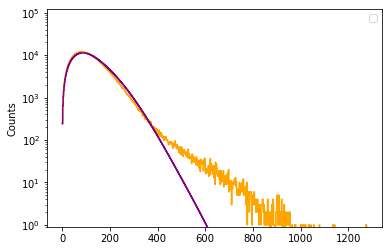

In [6]:
Catalog_Plot.VDH_plot(ss, '/Users/ruby/Astro/SSINS_tutorial_outputs', file_ext='pdf', post_flag=False)

In [7]:
# Create Incoherent Noise Spectrum
ins = SSINS.INS(ss)

Text(0, 0.5, 'Time (2s)')

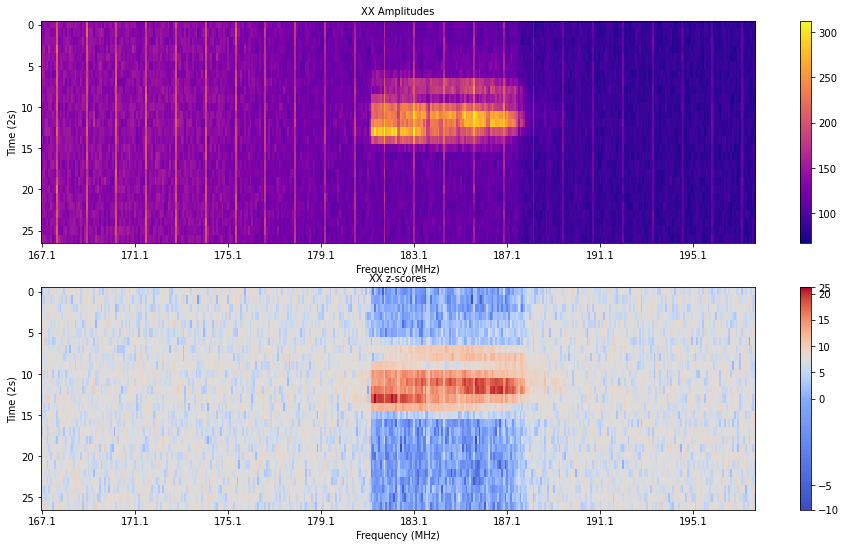

In [8]:
xticks = np.arange(0, len(ins.freq_array), 50)
xticklabels = ['%.1f' % (ins.freq_array[tick]* 10 ** (-6)) for tick in xticks]

# Let's plot the first polarization data and z-scores
fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
# The averaged amplitudes are stored in the metric_array parameter
plot_lib.image_plot(fig, ax[0], ins.metric_array[:, :, 0],
                    title='XX Amplitudes', xticks=xticks,
                    xticklabels=xticklabels)
ax[0].set_xlabel("Frequency (MHz)")
ax[0].set_ylabel("Time (2s)")
# The z-scores are stored in the metric_ms parameter.
# Let's choose a diverging colorbar and center it on zero using the cmap and midpoint keywords.
plot_lib.image_plot(fig, ax[1], ins.metric_ms[:, :, 0],
                    title='XX z-scores', xticks=xticks,
                    xticklabels=xticklabels, cmap=cm.coolwarm,
                    midpoint=True)
ax[1].set_xlabel("Frequency (MHz)")
ax[1].set_ylabel("Time (2s)")
#fig.savefig('/Users/ruby/Astro/SSINS_tutorial_outputs/SSINS_test.png')

In [9]:
sig_thresh = 5
mf = SSINS.MF(ins.freq_array, sig_thresh, streak=False, narrow=True, shape_dict={})
mf.apply_match_test(ins)

Text(0, 0.5, 'Time (2s)')

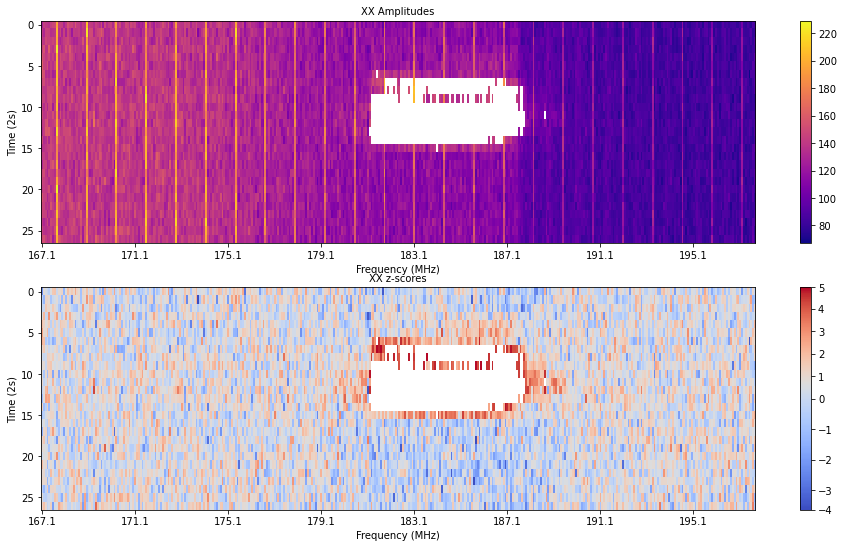

In [10]:
xticks = np.arange(0, len(ins.freq_array), 50)
xticklabels = ['%.1f' % (ins.freq_array[tick]* 10 ** (-6)) for tick in xticks]

# Let's plot the first polarization data and z-scores
fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
# The averaged amplitudes are stored in the metric_array parameter
plot_lib.image_plot(fig, ax[0], ins.metric_array[:, :, 0],
                    title='XX Amplitudes', xticks=xticks,
                    xticklabels=xticklabels)
ax[0].set_xlabel("Frequency (MHz)")
ax[0].set_ylabel("Time (2s)")
# The z-scores are stored in the metric_ms parameter.
# Let's choose a diverging colorbar and center it on zero using the cmap and midpoint keywords.
plot_lib.image_plot(fig, ax[1], ins.metric_ms[:, :, 0],
                    title='XX z-scores', xticks=xticks,
                    xticklabels=xticklabels, cmap=cm.coolwarm,
                    midpoint=True)
ax[1].set_xlabel("Frequency (MHz)")
ax[1].set_ylabel("Time (2s)")
#fig.savefig('/Users/ruby/Astro/SSINS_tutorial_outputs/SSINS_test.png')

In [11]:
ins = SSINS.INS(ss)  # Refresh INS
sig_thresh = 10 # Try a higher threshold
mf = SSINS.MF(ins.freq_array, sig_thresh, streak=False, narrow=True, shape_dict={})
mf.apply_match_test(ins)

Text(0, 0.5, 'Time (2s)')

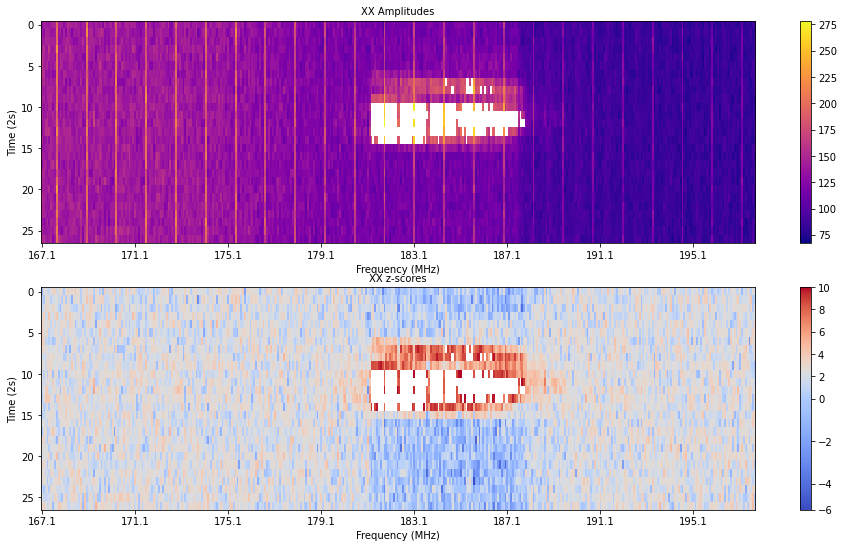

In [12]:
xticks = np.arange(0, len(ins.freq_array), 50)
xticklabels = ['%.1f' % (ins.freq_array[tick]* 10 ** (-6)) for tick in xticks]

# Let's plot the first polarization data and z-scores
fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
# The averaged amplitudes are stored in the metric_array parameter
plot_lib.image_plot(fig, ax[0], ins.metric_array[:, :, 0],
                    title='XX Amplitudes', xticks=xticks,
                    xticklabels=xticklabels)
ax[0].set_xlabel("Frequency (MHz)")
ax[0].set_ylabel("Time (2s)")
# The z-scores are stored in the metric_ms parameter.
# Let's choose a diverging colorbar and center it on zero using the cmap and midpoint keywords.
plot_lib.image_plot(fig, ax[1], ins.metric_ms[:, :, 0],
                    title='XX z-scores', xticks=xticks,
                    xticklabels=xticklabels, cmap=cm.coolwarm,
                    midpoint=True)
ax[1].set_xlabel("Frequency (MHz)")
ax[1].set_ylabel("Time (2s)")
#fig.savefig('/Users/ruby/Astro/SSINS_tutorial_outputs/SSINS_test.png')

In [13]:
ins = SSINS.INS(ss)  # Refresh INS
sig_thresh = 1 # Try a lower threshold
mf = SSINS.MF(ins.freq_array, sig_thresh, streak=False, narrow=True, shape_dict={})
mf.apply_match_test(ins)

Text(0, 0.5, 'Time (2s)')

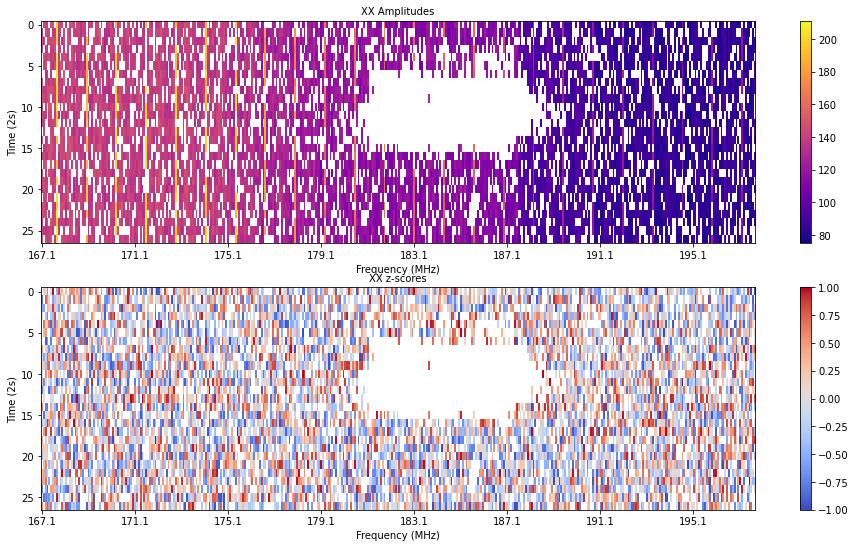

In [14]:
xticks = np.arange(0, len(ins.freq_array), 50)
xticklabels = ['%.1f' % (ins.freq_array[tick]* 10 ** (-6)) for tick in xticks]

# Let's plot the first polarization data and z-scores
fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
# The averaged amplitudes are stored in the metric_array parameter
plot_lib.image_plot(fig, ax[0], ins.metric_array[:, :, 0],
                    title='XX Amplitudes', xticks=xticks,
                    xticklabels=xticklabels)
ax[0].set_xlabel("Frequency (MHz)")
ax[0].set_ylabel("Time (2s)")
# The z-scores are stored in the metric_ms parameter.
# Let's choose a diverging colorbar and center it on zero using the cmap and midpoint keywords.
plot_lib.image_plot(fig, ax[1], ins.metric_ms[:, :, 0],
                    title='XX z-scores', xticks=xticks,
                    xticklabels=xticklabels, cmap=cm.coolwarm,
                    midpoint=True)
ax[1].set_xlabel("Frequency (MHz)")
ax[1].set_ylabel("Time (2s)")
#fig.savefig('/Users/ruby/Astro/SSINS_tutorial_outputs/SSINS_test.png')

In [15]:
ins = SSINS.INS(ss)  # Refresh INS
sig_thresh = 5
# Try streak flagging
mf = SSINS.MF(ins.freq_array, sig_thresh, streak=True, narrow=True, shape_dict={})
mf.apply_match_test(ins)

Text(0, 0.5, 'Time (2s)')

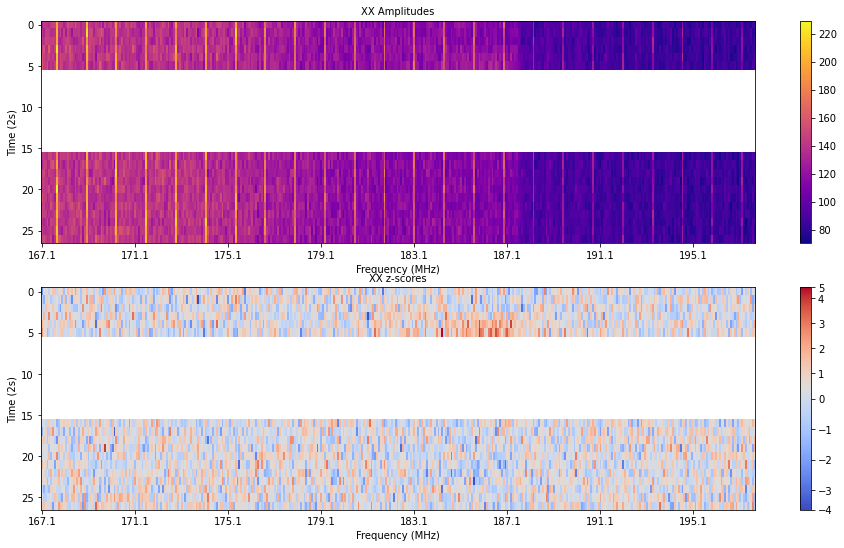

In [16]:
xticks = np.arange(0, len(ins.freq_array), 50)
xticklabels = ['%.1f' % (ins.freq_array[tick]* 10 ** (-6)) for tick in xticks]

# Let's plot the first polarization data and z-scores
fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
# The averaged amplitudes are stored in the metric_array parameter
plot_lib.image_plot(fig, ax[0], ins.metric_array[:, :, 0],
                    title='XX Amplitudes', xticks=xticks,
                    xticklabels=xticklabels)
ax[0].set_xlabel("Frequency (MHz)")
ax[0].set_ylabel("Time (2s)")
# The z-scores are stored in the metric_ms parameter.
# Let's choose a diverging colorbar and center it on zero using the cmap and midpoint keywords.
plot_lib.image_plot(fig, ax[1], ins.metric_ms[:, :, 0],
                    title='XX z-scores', xticks=xticks,
                    xticklabels=xticklabels, cmap=cm.coolwarm,
                    midpoint=True)
ax[1].set_xlabel("Frequency (MHz)")
ax[1].set_ylabel("Time (2s)")
#fig.savefig('/Users/ruby/Astro/SSINS_tutorial_outputs/SSINS_test.png')

In [17]:
ins = SSINS.INS(ss)  # Refresh INS
sig_thresh = 5
mf = SSINS.MF(ins.freq_array, sig_thresh, streak=False, narrow=True, shape_dict={})
mf.apply_match_test(ins)

In [18]:
# Read in uvf
uvd = pyuvdata.UVData()
uvd.read(filepath)
uvf = pyuvdata.UVFlag(uvd, waterfall=True, mode='flag')
uvd_original_flagged = pyuvdata.utils.apply_uvflag(uvd, uvf, inplace=False)
ins.flag_uvf(uvf, inplace=True)

In [19]:
uvd_flagged = pyuvdata.utils.apply_uvflag(uvd, uvf, inplace=False)

In [20]:
np.sum(uvd.flag_array)/np.size(uvd_flagged.flag_array)

0.1318326494107744

In [21]:
np.sum(uvd_original_flagged.flag_array)/np.size(uvd_flagged.flag_array)

0.1318326494107744

In [22]:
np.sum(uvd_flagged.flag_array)/np.size(uvd_flagged.flag_array)

0.18300377284752284

In [24]:
uvd.__class__

pyuvdata.uvdata.uvdata.UVData

In [25]:
uvd_ss = uvd.copy()

In [26]:
uvd_ss.MLE = None
uvd_ss.__class__ = SSINS.sky_subtract.SS

In [27]:
uvd_ss.diff()

Reordering data array to baseline order to perform differencing.
